In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('./boston.csv', encoding='gbk', header=0)

转化为dataframe的格式

In [4]:
df = pd.DataFrame(data)

In [5]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


# 先用pandas对数据进行预处理和分析

## 首先使用info（）获取该dataframe的相关信息概览

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


从中得知行列索引，空值个数\
只有RAD特征是整型，其他都是浮点型\
内存占用为55.5KB

## 也可以用isnull查看有没有空值

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

没有空缺值！

*在这个环节我搞了好久，因为我在网上找到的数据集有很多很多异常值，根本不知道从何下手，问学了python的同学这个数据集在哪找，最后在kaggle上找到了原数据*

使用describe函数查看该数据集的统计信息（如极值、各分位数、均值、中位数等）

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 用Matplotlib进行数据可视化

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
import matplotlib.pyplot as plt 

Matplotlib created a temporary cache directory at C:\Users\Raze\AppData\Local\Temp\matplotlib-j9ma3yz7 because the default path (C:\Users\Raze\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## 下面对各个特征与房价的关系进行可视化

1 指定默认字体  
2 解决保存图像是负号'-'显示为方块的问题  
*这两行几乎是必写的，第一行用于中文的正常显示*

In [11]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False 

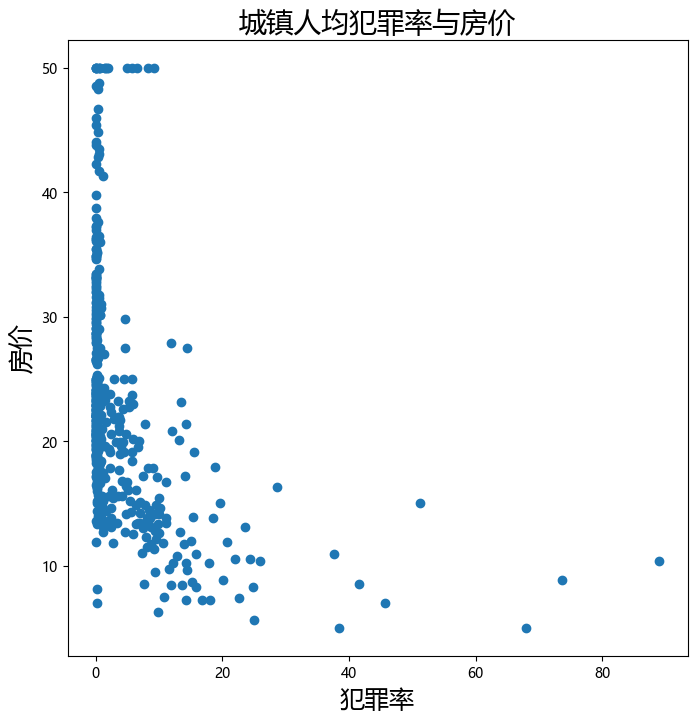

In [12]:
x = df['CRIM']
y = df['MEDV']

plt.figure(figsize = (8, 8))
plt.scatter(x, y)
plt.title('城镇人均犯罪率与房价', fontsize = 20)
plt.xlabel('犯罪率', fontsize = 18)
plt.ylabel('房价', fontsize = 18)

plt.show()

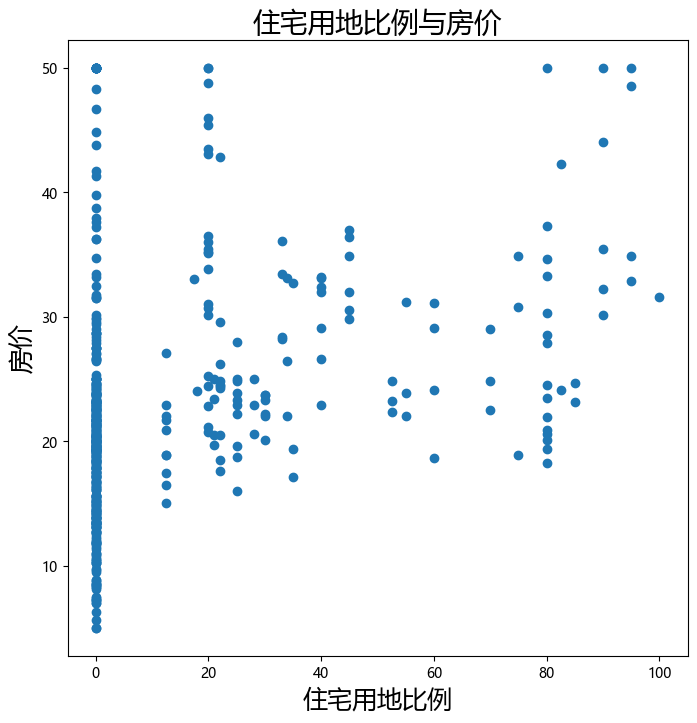

In [13]:
x = df['ZN']
y = df['MEDV']

plt.figure(figsize = (8, 8))
plt.scatter(x, y)
plt.title('住宅用地比例与房价', fontsize = 20)
plt.xlabel('住宅用地比例', fontsize = 18)
plt.ylabel('房价', fontsize = 18)

plt.show()

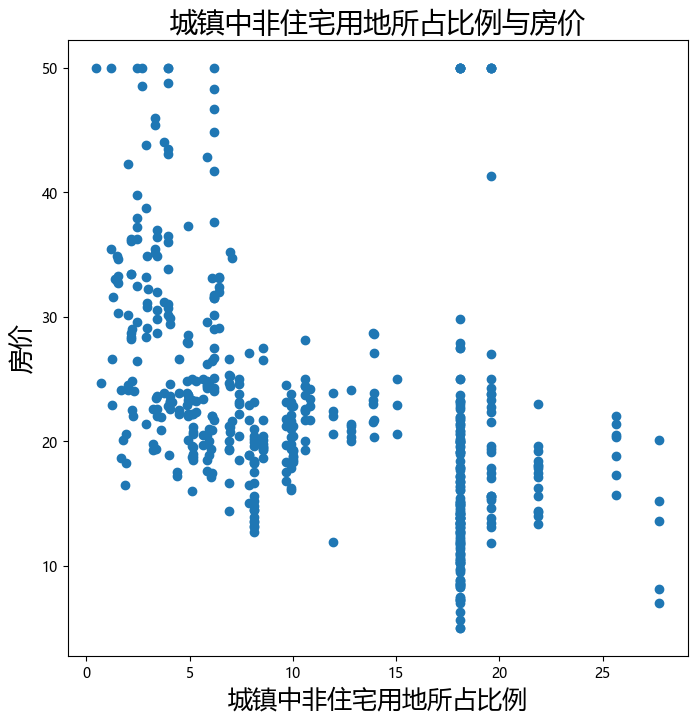

In [14]:
x = df['INDUS']
y = df['MEDV']

plt.figure(figsize = (8, 8))
plt.scatter(x, y)
plt.title('城镇中非住宅用地所占比例与房价', fontsize = 20)
plt.xlabel('城镇中非住宅用地所占比例', fontsize = 18)
plt.ylabel('房价', fontsize = 18)

plt.show()

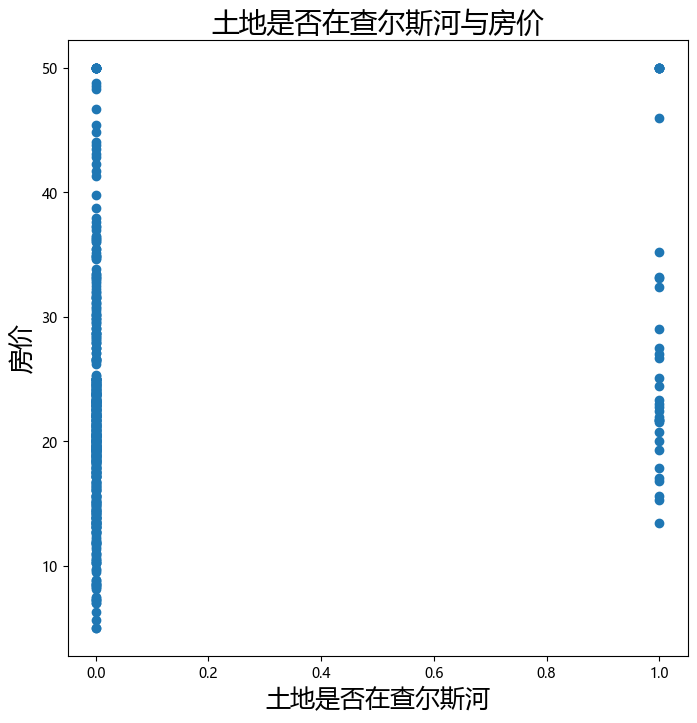

In [15]:
x = df['CHAS']
y = df['MEDV']

plt.figure(figsize = (8, 8))
plt.scatter(x, y)
plt.title('土地是否在查尔斯河与房价', fontsize = 20)
plt.xlabel('土地是否在查尔斯河', fontsize = 18)
plt.ylabel('房价', fontsize = 18)

plt.show()

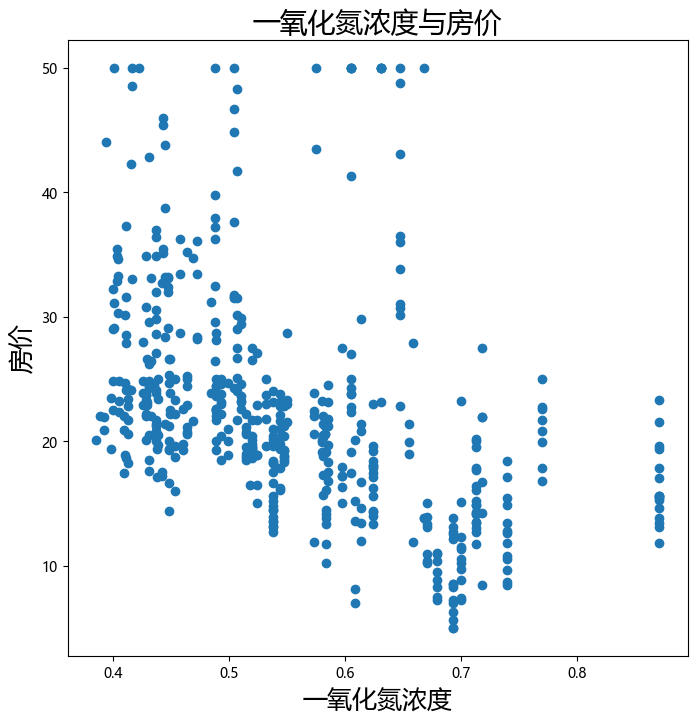

In [16]:
x = df['NOX']
y = df['MEDV']

plt.figure(figsize = (8, 8))
plt.scatter(x, y)
plt.title('一氧化氮浓度与房价', fontsize = 20)
plt.xlabel('一氧化氮浓度', fontsize = 18)
plt.ylabel('房价', fontsize = 18)

plt.show()

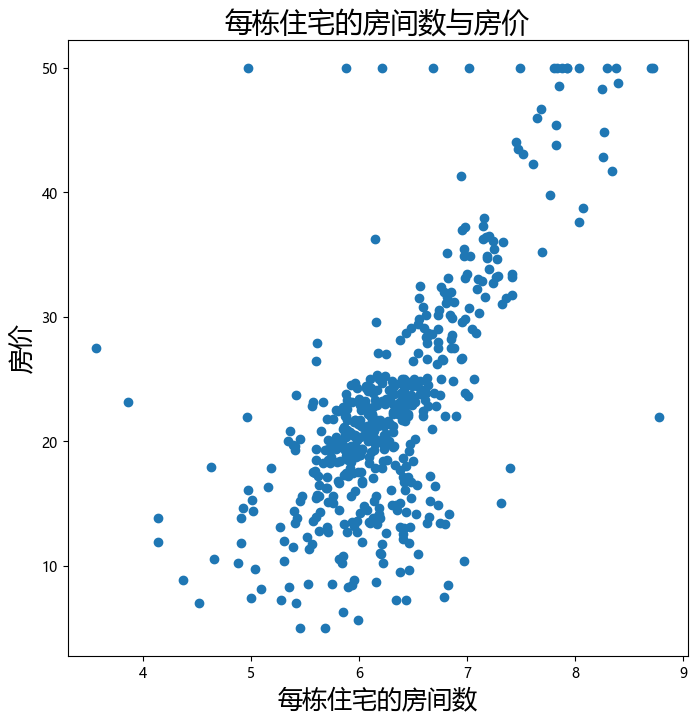

In [17]:
x = df['RM']
y = df['MEDV']

plt.figure(figsize = (8, 8))
plt.scatter(x, y)
plt.title('每栋住宅的房间数与房价', fontsize = 20)
plt.xlabel('每栋住宅的房间数', fontsize = 18)
plt.ylabel('房价', fontsize = 18)

plt.show()

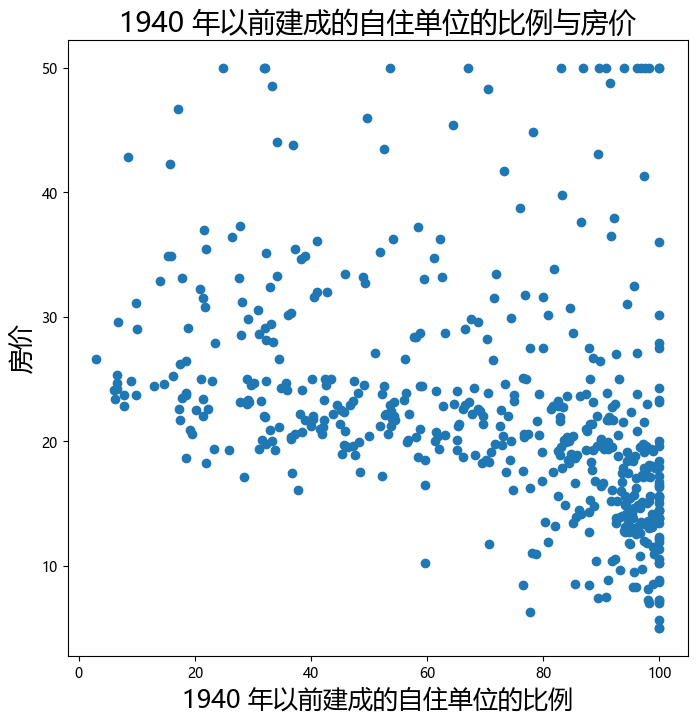

In [19]:
x = df['AGE']
y = df['MEDV']

plt.figure(figsize = (8, 8))
plt.scatter(x, y)
plt.title('1940 年以前建成的自住单位的比例与房价', fontsize = 20)
plt.xlabel('1940 年以前建成的自住单位的比例', fontsize = 18)
plt.ylabel('房价', fontsize = 18)

plt.show()

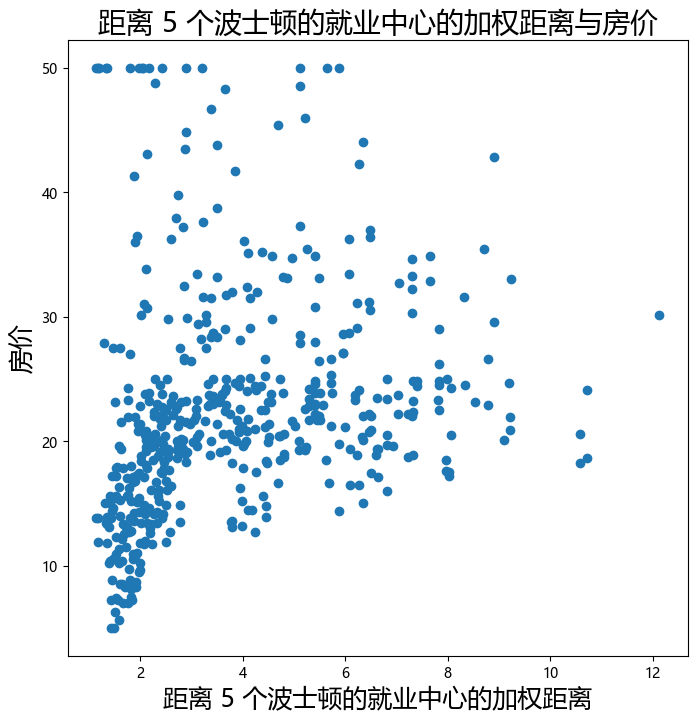

In [20]:
x = df['DIS']
y = df['MEDV']

plt.figure(figsize = (8, 8))
plt.scatter(x, y)
plt.title('距离 5 个波士顿的就业中心的加权距离与房价', fontsize = 20)
plt.xlabel('距离 5 个波士顿的就业中心的加权距离', fontsize = 18)
plt.ylabel('房价', fontsize = 18)

plt.show()

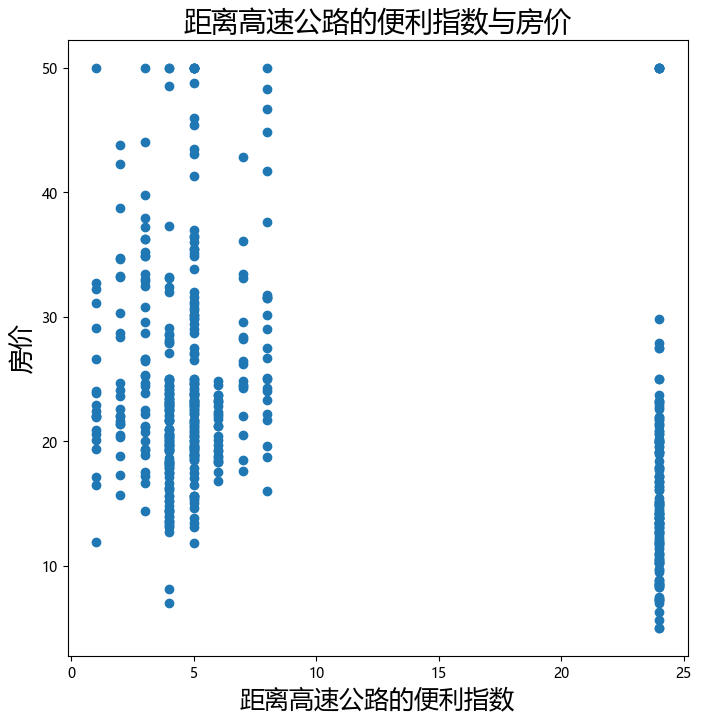

In [21]:
x = df['RAD']
y = df['MEDV']

plt.figure(figsize = (8, 8))
plt.scatter(x, y)
plt.title('距离高速公路的便利指数与房价', fontsize = 20)
plt.xlabel('距离高速公路的便利指数', fontsize = 18)
plt.ylabel('房价', fontsize = 18)

plt.show()

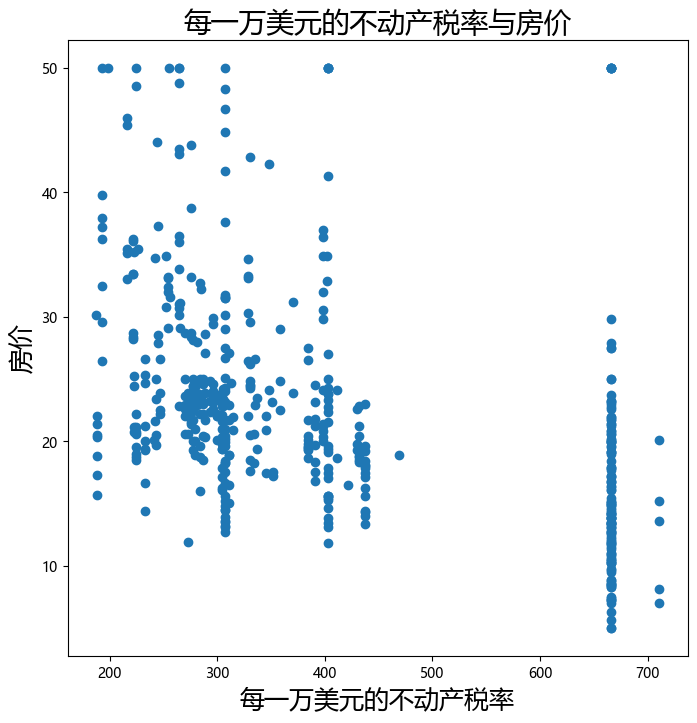

In [22]:
x = df['TAX']
y = df['MEDV']

plt.figure(figsize = (8, 8))
plt.scatter(x, y)
plt.title('每一万美元的不动产税率与房价', fontsize = 20)
plt.xlabel('每一万美元的不动产税率', fontsize = 18)
plt.ylabel('房价', fontsize = 18)

plt.show()

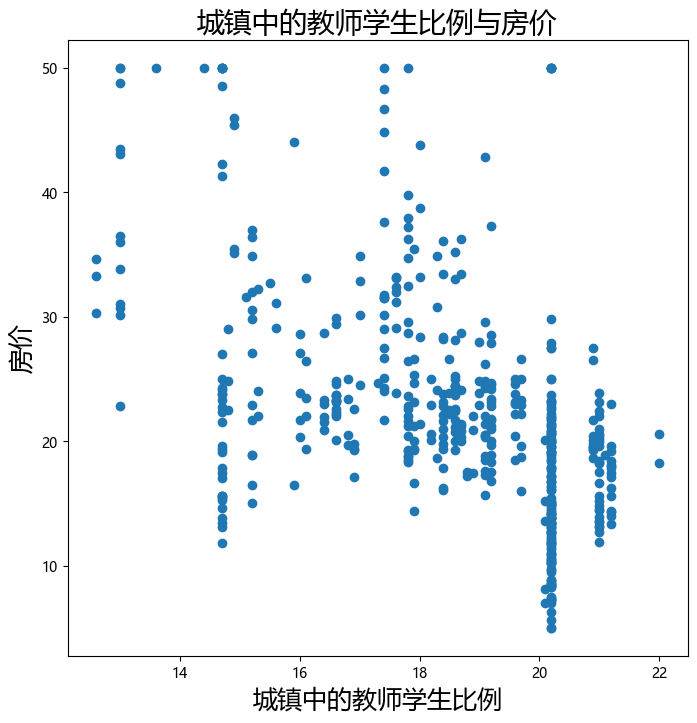

In [23]:
x = df['PTRATIO']
y = df['MEDV']

plt.figure(figsize = (8, 8))
plt.scatter(x, y)
plt.title('城镇中的教师学生比例与房价', fontsize = 20)
plt.xlabel('城镇中的教师学生比例', fontsize = 18)
plt.ylabel('房价', fontsize = 18)

plt.show()

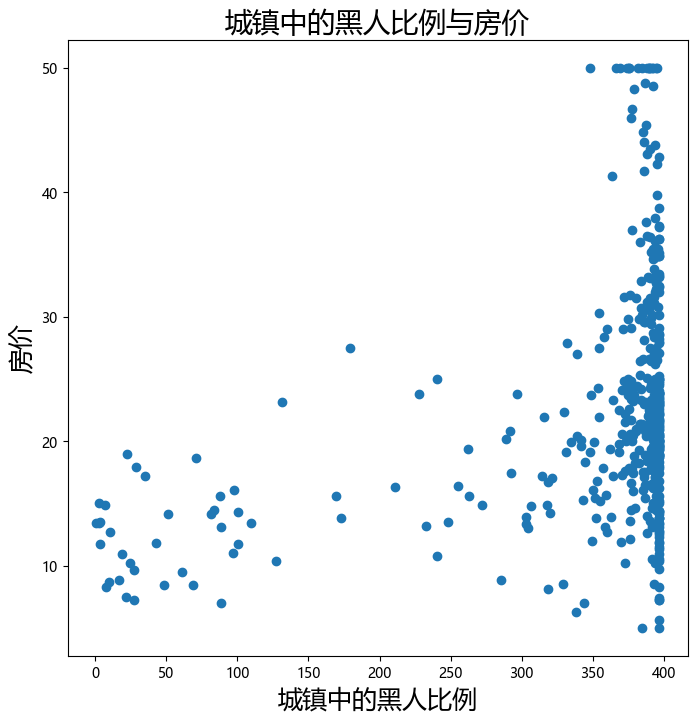

In [24]:
x = df['B']
y = df['MEDV']

plt.figure(figsize = (8, 8))
plt.scatter(x, y)
plt.title('城镇中的黑人比例与房价', fontsize = 20)
plt.xlabel('城镇中的黑人比例', fontsize = 18)
plt.ylabel('房价', fontsize = 18)

plt.show()

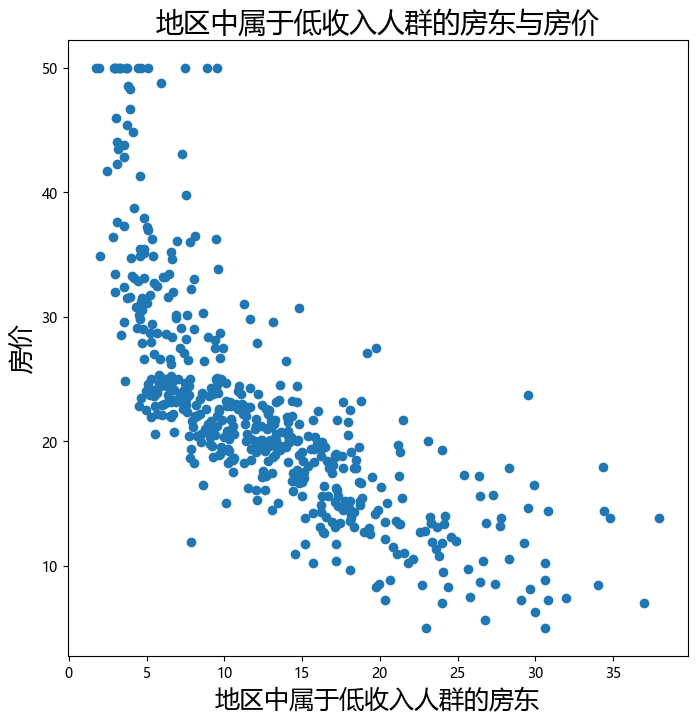

In [25]:
x = df['LSTAT']
y = df['MEDV']

plt.figure(figsize = (8, 8))
plt.scatter(x, y)
plt.title('地区中属于低收入人群的房东与房价', fontsize = 20)
plt.xlabel('地区中属于低收入人群的房东', fontsize = 18)
plt.ylabel('房价', fontsize = 18)

plt.show()